**THE DATASET NAME**: *Forbes Highest-Paid Athletes 1990–2020* 

This dataset consists of a complete list of the world’s highest-paid athletes since Forbes's first list in 1990. In 2002, was changed the reporting period from the full calendar year to June-to-June, and consequently, there are no records for 2001. The dataset consists of records till the year 2020. 
 
Dataset infrormation by columns:


1.   Name - First Name and Last Name of athlete
2.   Nationality - Citizenship, nationality of athlete
3.   Current rank - world rank in the year of record 
4.   Previous year rank - world rank in the previous year 
5.   Sport - kind of sport in which athlete took a part 
6.   Year - the year to which the record belongs
7.   Earnings ($ million) - athlete`s income for the year




**RESEARCH QUESTION**: *In which country and which sport do athletes have an increase in rating from 2016 to 2020?* 

# DATA SUMMARY

The data is colected by Forbes agency to show the highest-paid athletes in the time period from 1990-2020.
The data has been extracted from topendsports.com website and hosted on Kaggle.com

Data was uploaded to Github repository for the next steps of exploratory data analysis.
(https://github.com/Gokhman07/R_Gokhman_Project2/blob/master/Forbes%20Richest%20Atheletes%20(Forbes%20Richest%20Athletes%201990-2020).csv)

LIBRARY IMPORT

In [ ]:
import numpy as np
import pandas as pd

DATA UPLOAD

GITHUB

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Gokhman07/R_Gokhman_Project2/master/Forbes%20Richest%20Atheletes%20(Forbes%20Richest%20Athletes%201990-2020).csv')

LOCAL

In [ ]:
df=pd.read_csv('Desktop/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

HEAD OF DATASET (5 ROWS)

In [ ]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In cell below I delete default  column of ids and set dataframe ids +1

In [ ]:
df.index+=1
del df['S.NO']

In [ ]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


TAIL OF DATASET (5 ROWS)

In [ ]:
df.tail()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
297,Stephen Curry,USA,6,9,Basketball,2020,74.4
298,Kevin Durant,USA,7,10,Basketball,2020,63.9
299,Tiger Woods,USA,8,11,Golf,2020,62.3
300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
301,Carson Wentz,USA,10,>100,American Football,2020,59.1


Our data set provides the next use cases:



*  SPORTSMAN PRIVATE INFORTION:   
1.   Name- sportsman name, , no missing values, data type - string 
2.   Nationality - sportsman nationality, , no missing values,data type - string 
3.   SPORT - kind of sport in which sportsman takes a part, no missing values, data type - string 


---
*   SPORTMAN RANK:


1.   CURRENT RANK - rank in the year of record, , no missing values, data type - integer
2.   PREVIOUS YEAR RANK - sportsman`s rank in the previous year ; in column contains like numbers and values, that describes range ,like ">100",column contains some missing values, data type - string


---
*   YEAR - the year to which the record belongs, data type -integer
*   Earnings ($ million) - sportsman`s income for the year, no missing values, data type - float











In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 1 to 301
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In the cell below we figured that we have 82 athletes. We have 301 rows in the dataset, that some athletes become more than one time the world’s highest-paid .

We figured out that with help of function "nunique", that returns number of distinct elements.

In [ ]:
df['Name'].nunique()

82

In the cell below we figured that we have 22 nationalities of  the world’s highest-paid athletes .

In [ ]:
df['Nationality'].nunique()

22

In the cell below we figured that we have 29 sports, where people become the world’s highest-paid athletes from 1990-2020.

In [ ]:
df['Sport'].nunique()

29

# Data Management using PostgreSQL

**ED DIAGRAM**

We can distinguish 4 enitities in the Enitity relationship diagram given below: "record", "athlete", "sport","nationality".

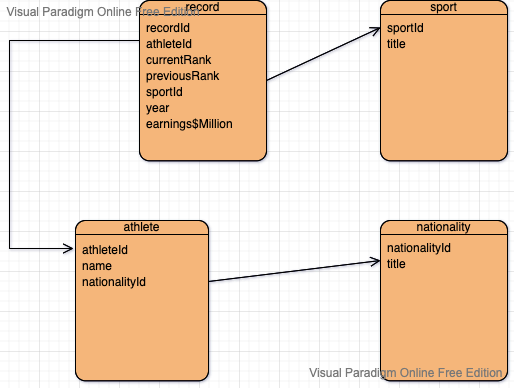

Enity "nationality":
*   nationalityId - identifier of nationality
*   title - name of nationality


Enity "athlete":
*   athleteId - identifier of athlete
*   name - name of athlete
*   nationalityId - identifier, that references on record of entity "nationality"

Enity "sport":
*   sportId - identifier of sport
*   title - kind of sport

Enity "athlete":
*   recordId - identifier of record
*   athleteId - identifier, that references on record of entity "athlete"
*   currentRank - athlete's world rank in the year of record
*   previousRank -  athlete's  previous world rank of record
*  sportId - identifier, that references on record of entity "sport"
*   year -  the year to which the record belongs
*   earnings$Million - athlete's income for the year












---


SQL statements that  created   database and tables within PostgreSQL

SQL statement for creating "sport" table - entity "sport":

CREATE TABLE IF NOT EXISTS public.sport
(

    "sportid" SERIAL,
    title character(30),
    CONSTRAINT sport_pkey PRIMARY KEY ("sportId")
)




SQL statement for creating "nationality" table - entity "nationality":

CREATE TABLE IF NOT EXISTS public.nationality
(

    "nationalityid" SERIAL,
    title character(11) COLLATE ,
    CONSTRAINT nationality_pkey PRIMARY KEY ("nationalityid")
)

SQL statement for creating "athlete" table - entity "athlete":

CREATE TABLE IF NOT EXISTS public.athlete(

	"athleteId" SERIAL,
	"name" character(30) COLLATE pg_catalog."default",
	"nationalityId" integer NOT NULL,
	CONSTRAINT athlete_pkey PRIMARY KEY("athleteId"),
	CONSTRAINT fk_nationality FOREIGN KEY("nationalityId") 
	REFERENCES nationality("nationalityId")
)


SQL statement for creating "record" table - entity "record":

CREATE TABLE IF NOT EXISTS public.record(

	"recordId" SERIAL,
	"athleteId" integer NOT NULL,
	"currentRank" integer NOT NULL,
	"previousRank" character(10) DEFAULT '0',
	"sportId" integer NOT NULL,
	"year" integer NOT NULL,
	"earnings$Million" numeric NOT NULL,
	CONSTRAINT record_pkey PRIMARY KEY ("recordId"),
	CONSTRAINT fk_athlete FOREIGN KEY("athleteId") 
	REFERENCES athlete("athleteId"),
	CONSTRAINT fk_sport FOREIGN KEY ("sportId")
	REFERENCES sport("sportId")

)
								


DATABASE STRUCTURE AFTER EXECUTION OF SQL  STATEMENTS(GENERATED BY pgAdmin)
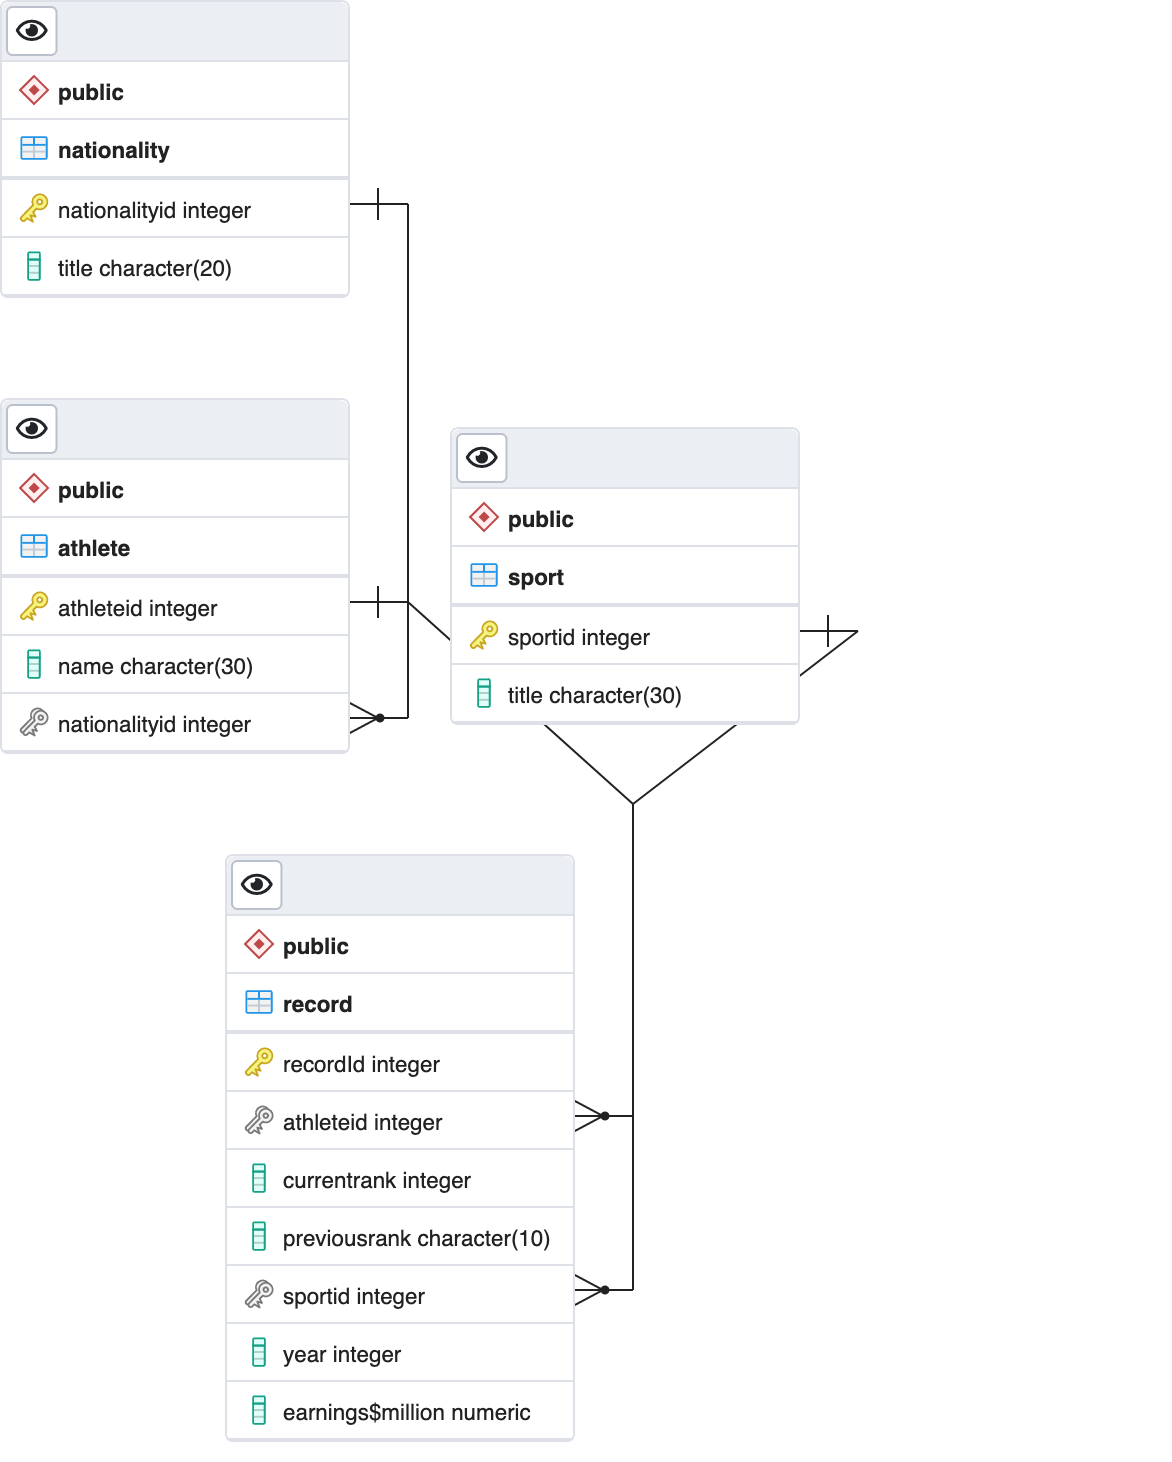

IMPORT LIBRARY TO INTERACT WITH PostgreSQL database

In [ ]:
import psycopg2

In [ ]:
conn=psycopg2.connect("host=localhost dbname=ATHLETES user=postgres password=printer10")

In [ ]:
cur=conn.cursor()

DATA PREPARATION AND DATA SUPPORT FOR DATABASE

In [ ]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


INFORMATION ABOUT OUR DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 1 to 301
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB




---


FOR TABLE SPORT

COLUMN 'Sport' contains  data for table 'SPORT'

'unique' was used for  search of all sports from column 'Sport'

In [ ]:
df['Sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

As we can see we have  same sports in the list, but some titles start from upper letter

As the next step we apply lower function on column 'Sport'

In [ ]:
low= lambda x: x.lower()

In [ ]:
import string
df['Sport']=df['Sport'].apply(low)
df['Sport']

1                 boxing
2                 boxing
3                 boxing
4            auto racing
5            auto racing
             ...        
297           basketball
298           basketball
299                 golf
300    american football
301    american football
Name: Sport, Length: 301, dtype: object

In [ ]:
df['Sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'nascar', 'hockey', 'auto racing (nascar)',
       'f1 racing', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [ ]:
print(f"{len(df['Sport'].unique())} sports, where people become the world’s highest-paid athletes from 1990-2020. ")

20 sports, where people become the world’s highest-paid athletes from 1990-2020. 


Insert sport values to Database

In [ ]:
sports=list(df['Sport'].unique())

In [ ]:
sports

['boxing',
 'auto racing',
 'golf',
 'basketball',
 'tennis',
 'nfl',
 'nba',
 'baseball',
 'ice hockey',
 'american football / baseball',
 'f1 motorsports',
 'nascar',
 'hockey',
 'auto racing (nascar)',
 'f1 racing',
 'american football',
 'soccer',
 'cycling',
 'motorcycle gp',
 'mma']

In the cell below I inserted all sports to database

In [ ]:
for sport in sports:
  cur.execute(f"INSERT INTO sport(\"title\") VALUES ('{sport}')")
  conn.commit()

Result after query execution in database

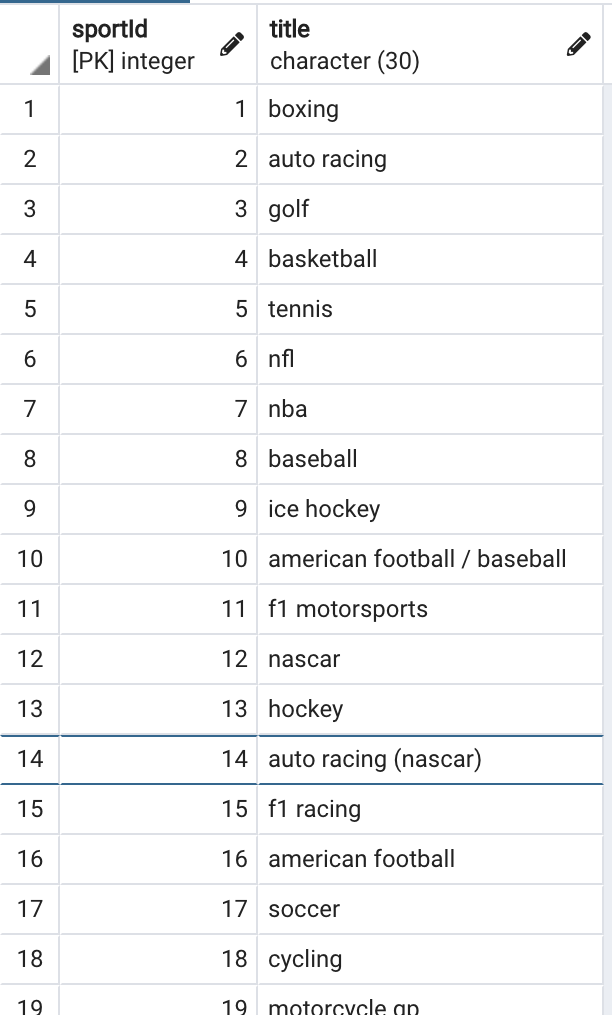



---


FOR NATIONALITY

COLUMN 'Natiomnality' contains  data for table 'nationality'

'unique' was used for  search of all sports from column 'nationality'.

We have only distinct values in the list below

In [ ]:
df['Nationality'].unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

Insert nationality values to Database

In [ ]:
nationalities=list(df['Nationality'].unique())

In [ ]:
for nationality in nationalities:
  cur.execute(f"INSERT INTO nationality(\"title\") VALUES ('{nationality}')")
  conn.commit()

Result after query execution in database

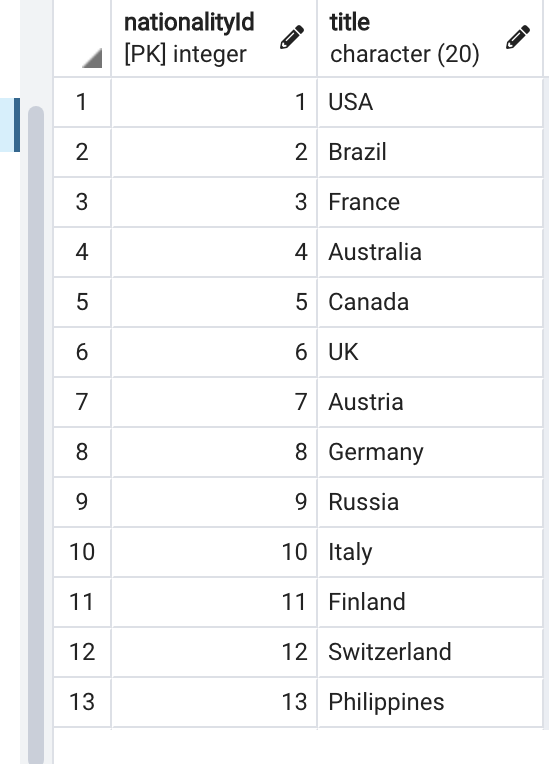



---
FOR TABLE ATHLETE

COLUMN 'Name' contains data for column 'name' for 'athlete' table

COLUMN 'Nationality' contains data for column 'nationalityId' for 'athlete' table




DATA PREPARATION

In [ ]:
athletes=[]

In names that contain "'" we change on "`". In other case we can not execute query

In [ ]:
df['Name']=df['Name'].map(lambda x : x.replace("'","`"))

In [ ]:
for i in range(1,len(df)):
   athletes.append((df['Name'][i],nationalities.index(df['Nationality'][i])+1))

In [ ]:
athletes[:10]

[('Mike Tyson', 1),
 ('Buster Douglas', 1),
 ('Sugar Ray Leonard', 1),
 ('Ayrton Senna', 2),
 ('Alain Prost', 3),
 ('Jack Nicklaus', 1),
 ('Greg Norman', 4),
 ('Michael Jordan', 1),
 ('Arnold Palmer', 1),
 ('Evander Holyfield', 1)]

In [ ]:
len(athletes)

300

As the next we should delete duplicates. We can have it, because some people become  highest-paid athletes  several times

In [ ]:
athletes=[athlet for athlet in (set(tuple(i) for i in athletes))]

 We have 83 records without duplicates



In [ ]:
len(athletes)

83

INSERT INTO DATABASE




In [ ]:
for athlete in athletes:
  cur.execute(f"INSERT INTO athlete(\"name\",\"nationalityid\") VALUES ('{athlete[0]}',{athlete[1]})")
  conn.commit()

RESULT AFTER QUERY EXECUTION

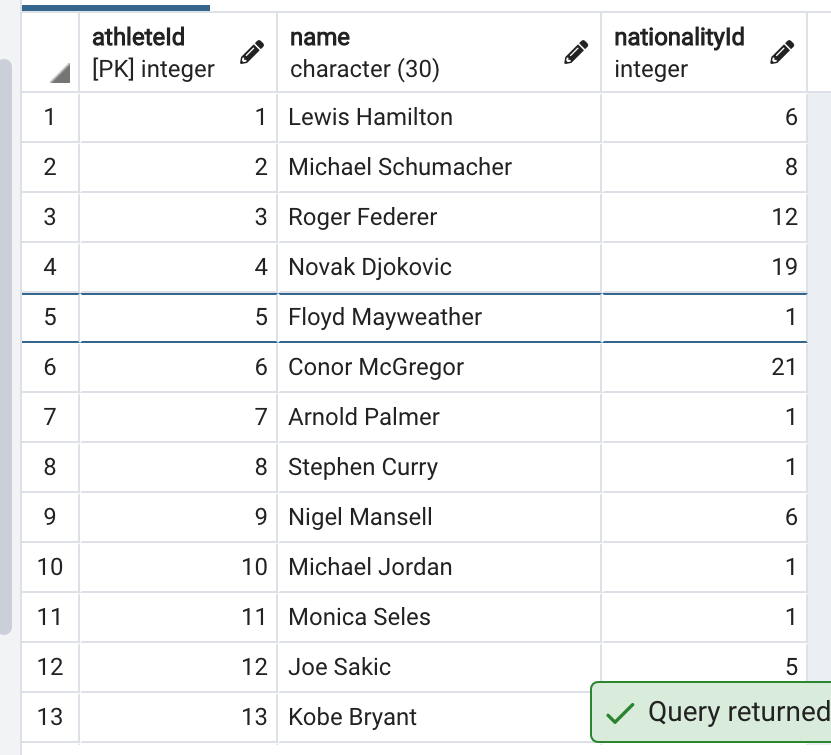



---


FOR TABLE RECORD

We use all columns

In [ ]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In "Previous Year Rank"  we have missing values. We replaced by value 0

In [ ]:
df['Previous Year Rank'].fillna('0', inplace=True)

In [ ]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
1,Mike Tyson,USA,1,0,boxing,1990,28.6
2,Buster Douglas,USA,2,0,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,0,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,0,auto racing,1990,10.0
5,Alain Prost,France,5,0,auto racing,1990,9.0


'Name','Nationality' - will be used for defining 'athleteId'

'Current Rank' - for field 'currentRank'

'Previous Year Rank' - for filed 'peviousRank'

'Sport' - will be used for defining 'sportId

'Year' - will be used for defining 'year'

'earnings ($ million)' - for field 'earnings$Million'

INSERT INTO DATABASE

In [ ]:
for i in range(1,len(df)):
  data=[]

  #define athleteId
  data.append(athletes.index((df['Name'][i],nationalities.index( df['Nationality'][i])+1))+1)

  #define currentRank
  data.append(df['Current Rank'][i])

  #define peviousRank'
  data.append(df['Previous Year Rank'][i])

  #define sports
  data.append(sports.index(df['Sport'][i])+1)

  #define year
  data.append(df['Year'][i])

  #define earnings$Million
  data.append(df['earnings ($ million)'][i])

  cur.execute(f"INSERT INTO record(\"athleteid\",\"currentrank\",\"previousrank\",\"sportid\",\"year\",\"earnings$nillion\") VALUES ('{data[0]}',{data[1]},'{data[2]}',{data[3]},{data[4]},{data[5]})")
  conn.commit()

RESULT AFTER EXECUTION

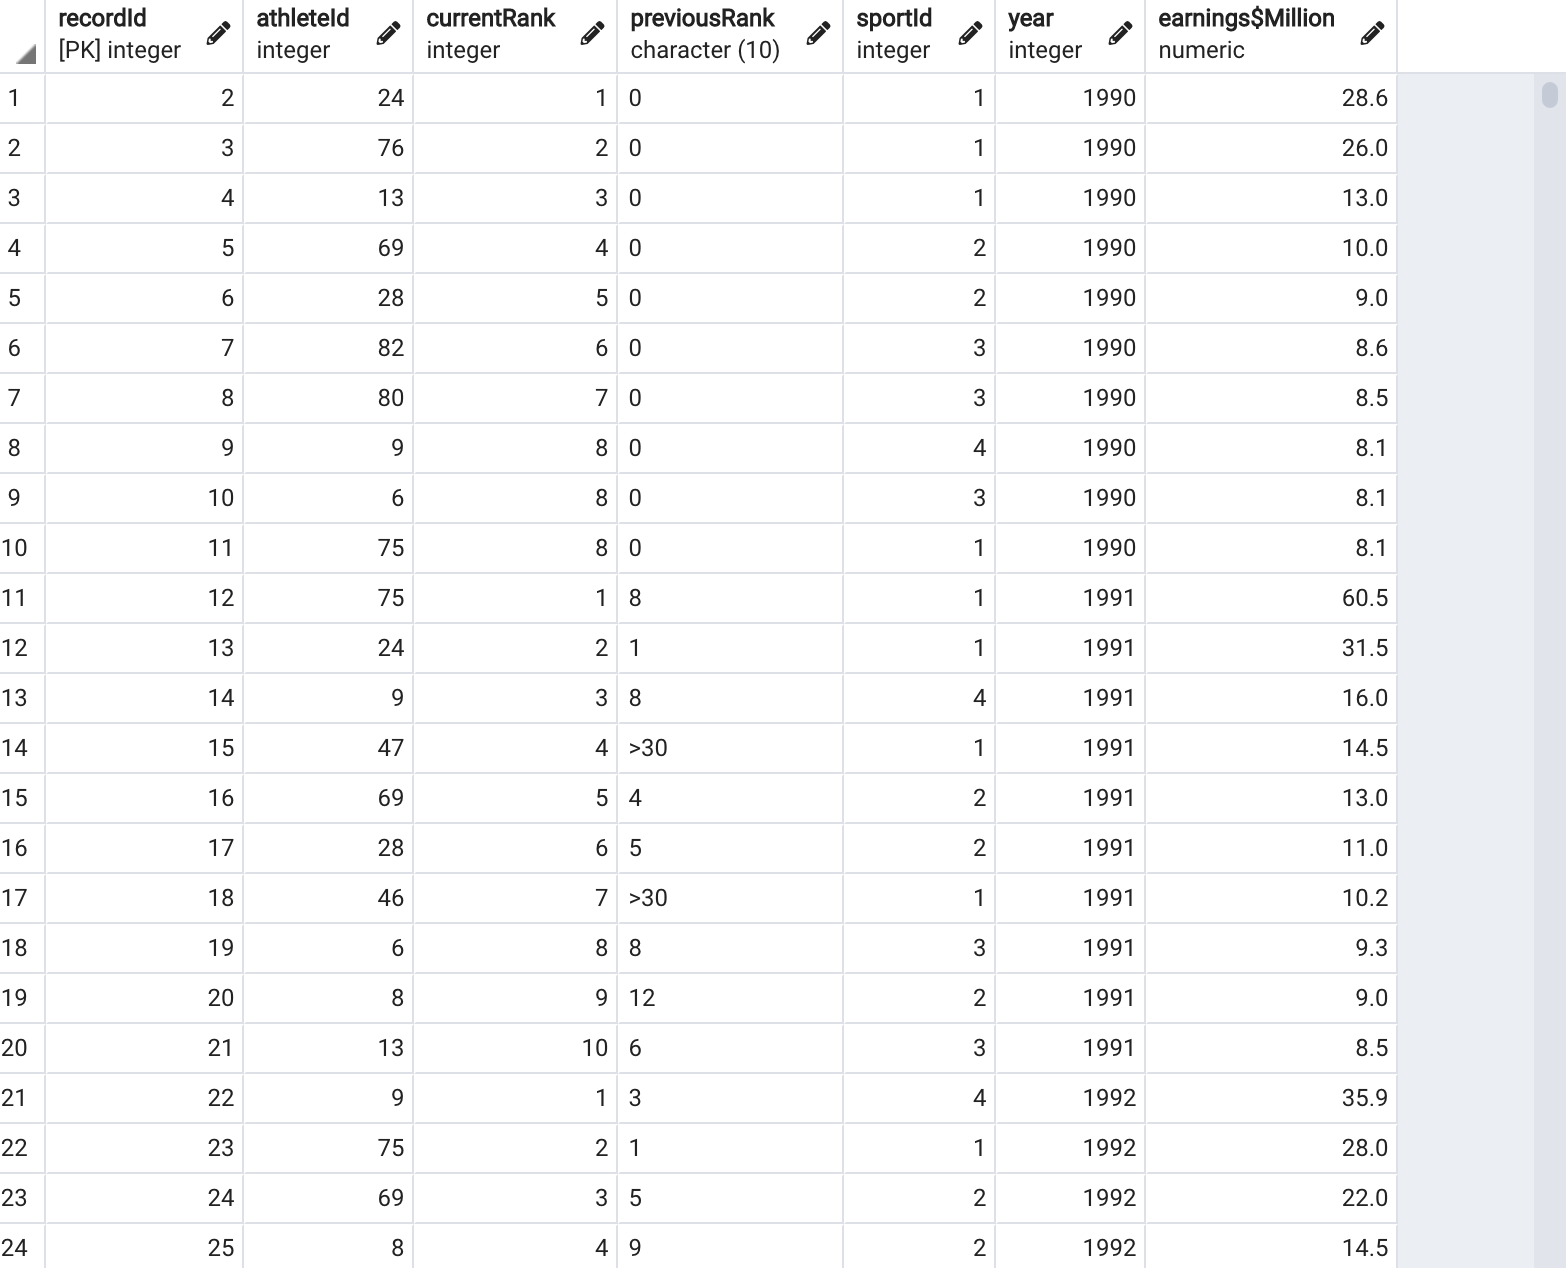

Using your knowledge of Python, Pandas, and PostgreSQL, read your dataset from your new PostgreSQL 
database into a new Pandas dataframe within your Jupyter Notebook, using whatever SQL statements and 
Python logic you believe to be appropriate. 



---




In [ ]:
cur.execute('''
SELECT athl.name as "Name", nat.title as "Nationality" ,sport.title as "Sport",rec.currentrank, 
rec.previousrank, rec.year, rec.earnings$million FROM record as rec
JOIN athlete as athl ON rec.athleteid = athl.athleteid
JOIN sport  ON rec.sportid = sport.sportid
JOIN nationality as nat ON athl.nationalityid = nat.nationalityid
''')

In [ ]:
allData = cur.fetchall()

DEFINE DATAFRAME FOR DATA FROM DATABASE

In [ ]:
dic={
       'Name':[],
    'Nationality':[],
    'Sport':[],
    'currentRank':[],
    'previousRank':[],
    'Year':[],
    'Earnings ($) million':[]
}
df2=pd.DataFrame(dic)

INSERT DATA INTO DATAFRAME

In [ ]:
for i,data in enumerate(allData):

  df2.loc[i]=[data[0].strip() , data[1].strip(), 
             data[2].strip(),data[3],data[4],
             data[5],data[6]]

CLOSE CONNECTION WITH DATABASE AFTER EXECUTING ALL OPERATIONS WITH DATABASE

In [ ]:
conn.close()

DATAFRAME WITH DATA FROM DATABASE

In [ ]:
df2.head()

,Name,Nationality,Sport,currentRank,previousRank,Year,Earnings ($) million
0,Aaron Rodgers,USA,boxing,1,0,1990,28.6
1,Evander Holyfield,USA,boxing,2,0,1990,26.0
2,Kobe Bryant,USA,boxing,3,0,1990,13.0
3,Matt Ryan,USA,auto racing,4,0,1990,10.0
4,Jacques Villeneuve,Canada,auto racing,5,0,1990,9.0


# Exploratory Data Analysis (EDA)

Using my newly created dataframe (see Part 3, #6), I gonna provide 
summary statistics for each attribute within the dataframe. Provide appropriate graphical analysis for each attribute 
using basic Pandas graphics.  Include a narrative describing your EDA findings, i.e., what I have  learned from your 
summary statistics and graphics.  

ANALYSIS FOR ATTRIBUTE 'Name'

In [ ]:
import matplotlib.pyplot as plt

ANALYSIS FOR ATTRIBUTE 'Nationality'

<AxesSubplot: >

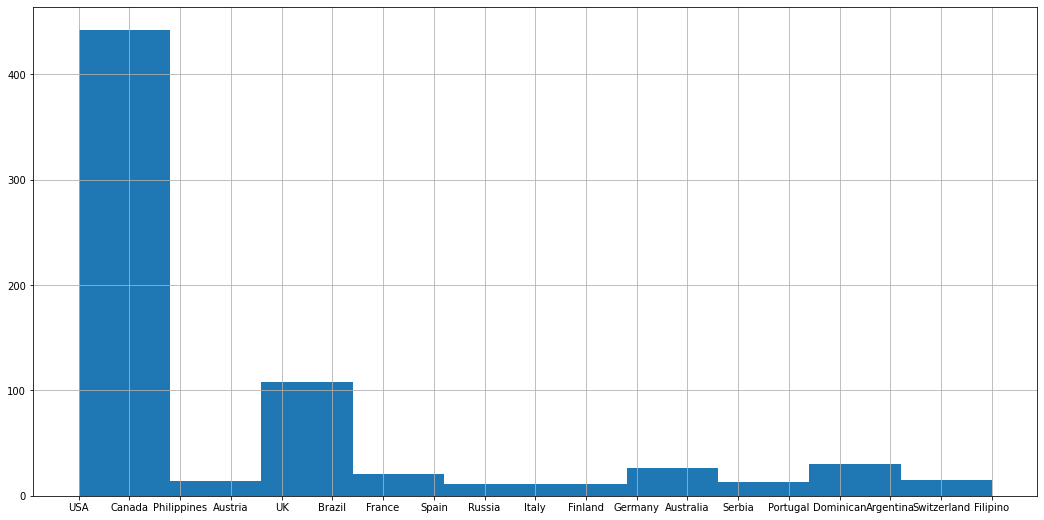

In [ ]:
df2['Nationality'].hist(figsize=(18, 9))

As we can see from chart above, USA and BRAZIL have the most number of highest-paid thletes in 1990–2020

ANALYSIS OF ATTRIBUTES 'YEAR' AND 'Earnings ($) million' : IN WHICH YEAR ATHLETES GOT THE HIGHEST INCOME SUMMARY?

AS WE CA SEE FROM CHART, 2015 IS YEAR, WHEN ATHLETES GOT THE HIGHEST INCOME SUMMARY

In [ ]:
#convert values to float format
df2['Earnings ($) million']=df2['Earnings ($) million'].map(float)

In [ ]:
df2.head()

,Name,Nationality,Sport,currentRank,previousRank,Year,Earnings ($) million
0,Aaron Rodgers,USA,boxing,1,0,1990,28.6
1,Evander Holyfield,USA,boxing,2,0,1990,26.0
2,Kobe Bryant,USA,boxing,3,0,1990,13.0
3,Matt Ryan,USA,auto racing,4,0,1990,10.0
4,Jacques Villeneuve,Canada,auto racing,5,0,1990,9.0


<ipython-input-689-a442ccf7582a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Year').sum()['Earnings ($) million'].plot.bar(figsize=(12, 9))


<AxesSubplot: xlabel='Year'>

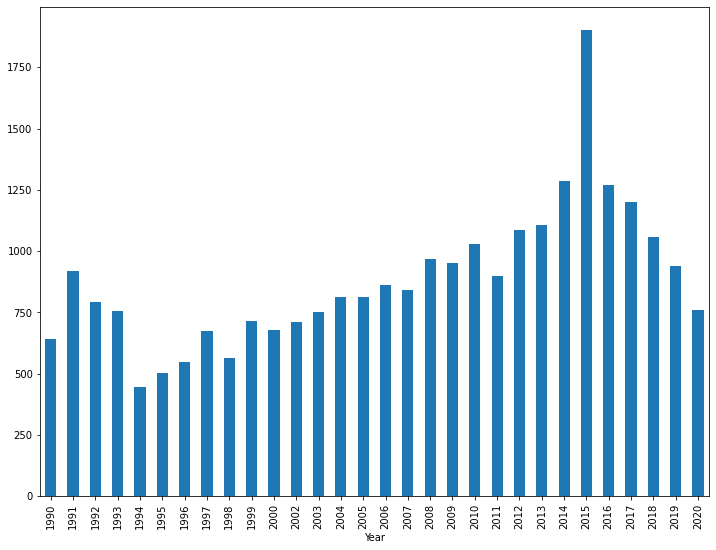

In [ ]:
df2.groupby('Year').sum()['Earnings ($) million'].plot.bar(figsize=(12, 9))

ANALYSIS OF ATTRIBUTES 'NAME'. AS WE CAN SEE PERSON WHO BECOME THE MOST TIMES THE HIGHEST WELL-PAID ATHLETE - NIGEL MANSEL

<AxesSubplot: >

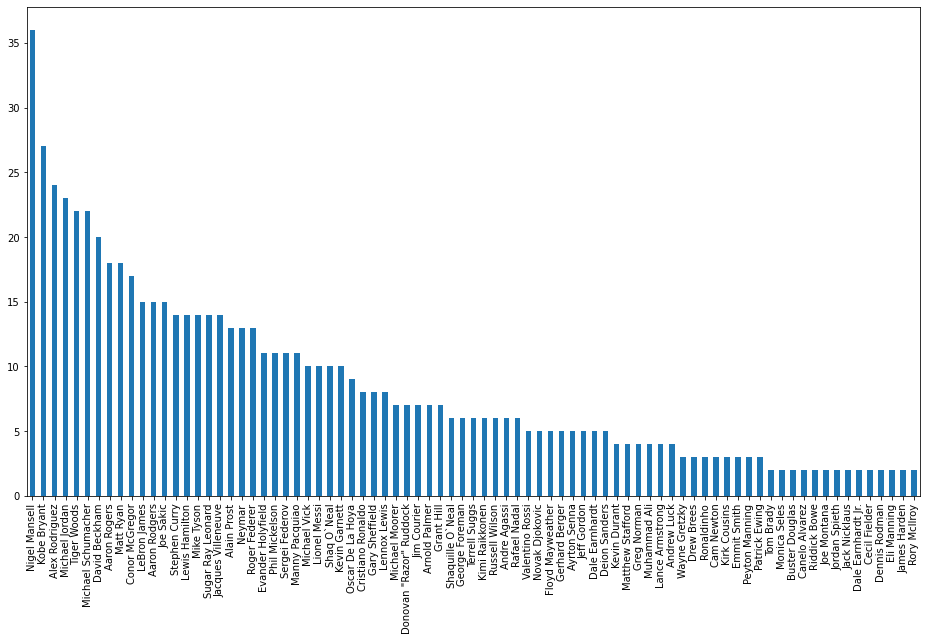

In [ ]:
df2['Name'].value_counts().plot.bar(figsize=(16, 9))

ANALYSIS OF ATTRIBUTES 'SPORT' AND 'Earnings ($) million'.
AS WE CAN SEE ATHLETES IN BASKETBALL  GET THE BIGGEST INCOME IN SUMMARY

<ipython-input-684-dc10b8452e9f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Sport').sum()['Earnings ($) million'].plot.bar(figsize=(12, 9))


<AxesSubplot: xlabel='Sport'>

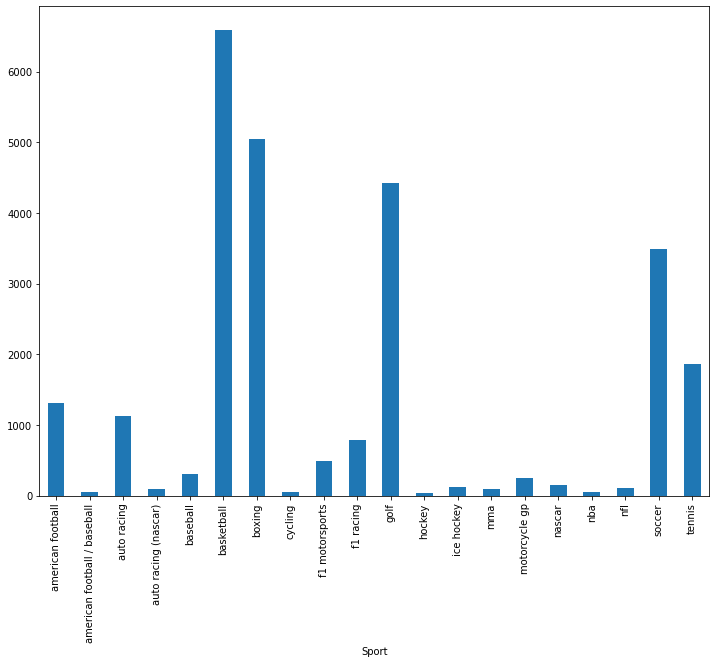

In [ ]:
df2.groupby('Sport').sum()['Earnings ($) million'].plot.bar(figsize=(12, 9))

ANALYSIS OF ATTRIBUTES 'currentRank' AND 'Earnings ($) million'.
AS WE CAN SEE ATHLETES IN BASKETBALL  GET THE BIGGEST INCOME IN SUMMARY.

AS WE CAN SEE PEOPLE WITH CURRENT RANK "1" GET THE HIGHEST INCOME

<ipython-input-683-83e0af218f28>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('currentRank').sum()['Earnings ($) million'].plot.bar(figsize=(12, 9))


<AxesSubplot: xlabel='currentRank'>

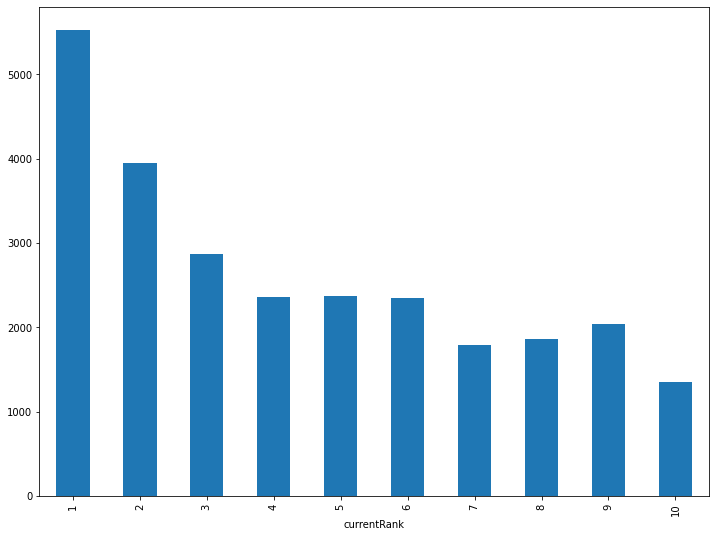

In [ ]:
df2.groupby('currentRank').sum()['Earnings ($) million'].plot.bar(figsize=(12, 9))

ANALYSIS OF ATTRIBUTES 'previousRank' AND 'Earnings ($) million'. 
AS WE CAN SEE PEOPLE WHO WAS A PREVIOUS RANK BIGGER THANK BECOME THE HIGHEST WELL-PAID ATHLETE.

<ipython-input-682-2de2883b3a49>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('previousRank').sum()['Earnings ($) million'].plot.bar(figsize=(12, 9))


<AxesSubplot: xlabel='previousRank'>

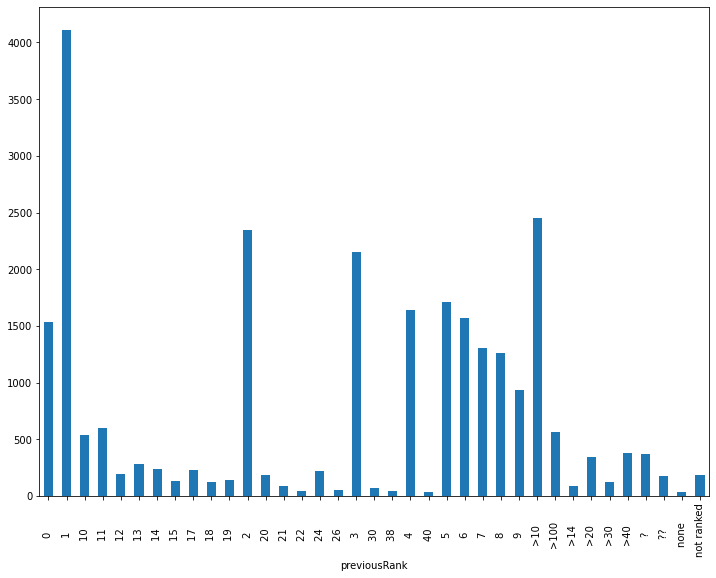

In [ ]:
df2.groupby('previousRank').sum()['Earnings ($) million'].plot.bar(figsize=(12, 9))



---

# RESEARCH QUESTION
Inference (20 Points) – Perform whatever analysis is necessary to answer your research question. Your analysis 
should include at least one graphic.  Include a narrative explaining your research approach and findings and be sure 
include any Python code used as part of your work. 

**RESEARCH QUESTION**: *In which country and which sport do athletes have the biggest  increase in rating from 2016 to 2020?* 

As first we choose from dataset rows between 2016 and 2020

In [ ]:
df3=df2[(df2['Year']>=2016) & (df2['Year']<=2020)].copy()

In [ ]:
df3.head()

,Name,Nationality,Sport,currentRank,previousRank,Year,Earnings ($) million
372,Cristiano Ronaldo,Portugal,soccer,1,3,2016,88.0
373,Michael Moorer,USA,soccer,2,4,2016,81.4
374,Sugar Ray Leonard,USA,basketball,3,6,2016,77.2
375,Michael Schumacher,Germany,tennis,4,5,2016,67.8
376,Kevin Durant,USA,basketball,5,7,2016,56.2


For the next step We should calculate rank defference between previous and current rank.
For this step we should convert previousRank column to integer

In [ ]:
#list, that contains all rank differences
rankDifference=[]

In [ ]:
#list, that contains all int of previousRank
previousRankint=[]

We will use regex for defining  integer previous rank , in some cases we have previous rank like '>100', '1', '<10','4' - I will extract integer values with help of regex.
In cases like 'not ranked', '??' and etc,  row will be dropped this record.

In [ ]:
#initial length of dataframe
initLen=len(df3)
initLen

68

In [ ]:
import re

In [ ]:
for i,el in enumerate(df3['previousRank']):

  extract=re.findall('\d+',el)
  
  if extract:
    previousRankint.append(int(''.join(extract)))
  else:
     df3= df3.drop(df3.index[i])
  


We dropped only 2 rows.

In [ ]:
beginLen  -len(df3)

2

In [ ]:
df3['previousRank']=previousRankint
df3.head()

,Name,Nationality,Sport,currentRank,previousRank,Year,Earnings ($) million
372,Cristiano Ronaldo,Portugal,soccer,1,3,2016,88.0
373,Michael Moorer,USA,soccer,2,4,2016,81.4
374,Sugar Ray Leonard,USA,basketball,3,6,2016,77.2
375,Michael Schumacher,Germany,tennis,4,5,2016,67.8
376,Kevin Durant,USA,basketball,5,7,2016,56.2


As this stage I can calculate rank difference

In [ ]:
df3['differenceRank']=df3['previousRank']-df3['currentRank']

In [ ]:
df3['differenceRank']

372     2
373     2
374     3
375     1
376     2
       ..
686     3
687     3
688     3
689     3
690    91
Name: differenceRank, Length: 66, dtype: int64



---


On the next step we will answer **in which country**   athletes have the biggest increase in rating from 2016 to 2020.
We will define it by mean value of rank difference

In [ ]:
df3.groupby('Nationality').mean()['differenceRank']

<ipython-input-672-d3721ce2a292>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby('Nationality').mean()['differenceRank']


Nationality
Argentina       0.200000
Brazil          9.000000
Canada          0.000000
Dominican       3.000000
Filipino       -9.000000
France         11.000000
Germany         0.500000
Portugal        1.000000
Russia          0.200000
Serbia          7.000000
Switzerland     1.833333
UK             -5.000000
USA            12.058824
Name: differenceRank, dtype: float64

<ipython-input-681-97ebf133af6c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby('Nationality').mean()['differenceRank'].plot.bar(figsize=(12, 9))


<AxesSubplot: xlabel='Nationality'>

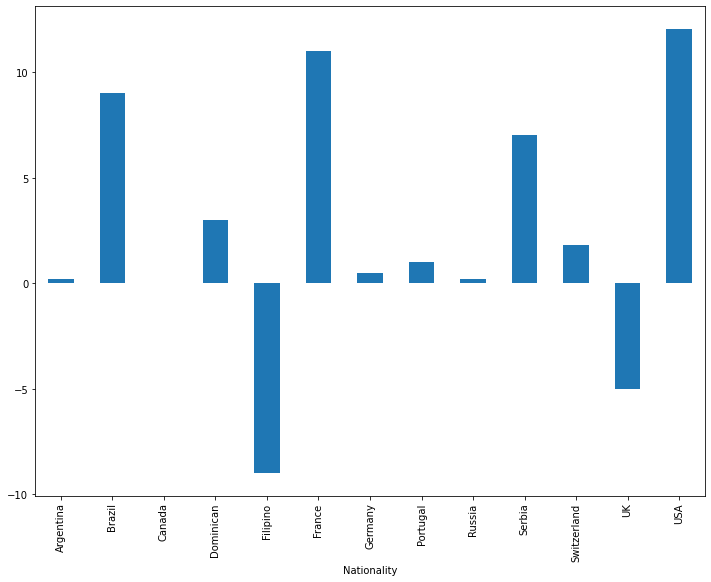

In [ ]:
df3.groupby('Nationality').mean()['differenceRank'].plot.bar(figsize=(12, 9))

As We can see from numeric results and plot in USA(first place) and France are countries, where athletes have the biggest increase in rating from 2016 to 2020.



---


On the next step we will answer **in which sport** athletes have the biggest increase in rating from 2016 to 2020. We will define it by mean value of rank difference

In [ ]:
df3.groupby('Sport').mean()['differenceRank']

<ipython-input-674-6c3dfdc86773>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby('Sport').mean()['differenceRank']


Sport
american football    35.625000
auto racing         -10.000000
basketball           -0.809524
boxing               55.000000
golf                  6.714286
mma                  20.000000
soccer                1.117647
tennis                2.111111
Name: differenceRank, dtype: float64

<ipython-input-680-7f3288c21f56>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby('Sport').mean()['differenceRank'].plot.bar(figsize=(12, 9))


<AxesSubplot: xlabel='Sport'>

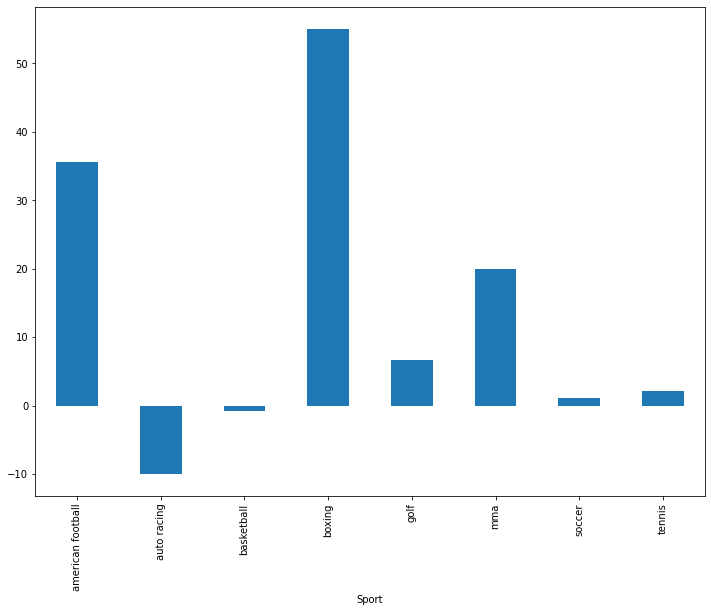

In [ ]:
df3.groupby('Sport').mean()['differenceRank'].plot.bar(figsize=(12, 9))

As We can see from numeric results and plot , that in boxing athletes have the biggest increase in rating from 2016 to 2020.



---
I found that in USA athletes have the biggest increase in rating from 2016 to 2020.
The last step to answer **in which sport ** USA athletes have the highest increase.


In [ ]:
df3[df3['Nationality']=='USA'].groupby('Sport').mean()['differenceRank']

<ipython-input-676-897d6184682c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3[df3['Nationality']=='USA'].groupby('Sport').mean()['differenceRank']


Sport
american football    35.625000
basketball           -0.421053
boxing               99.000000
golf                  8.250000
soccer                0.500000
Name: differenceRank, dtype: float64

<ipython-input-679-ffb17a2f6446>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3[df3['Nationality']=='USA'].groupby('Sport').mean()['differenceRank'].plot.bar(figsize=(12, 9))


<AxesSubplot: xlabel='Sport'>

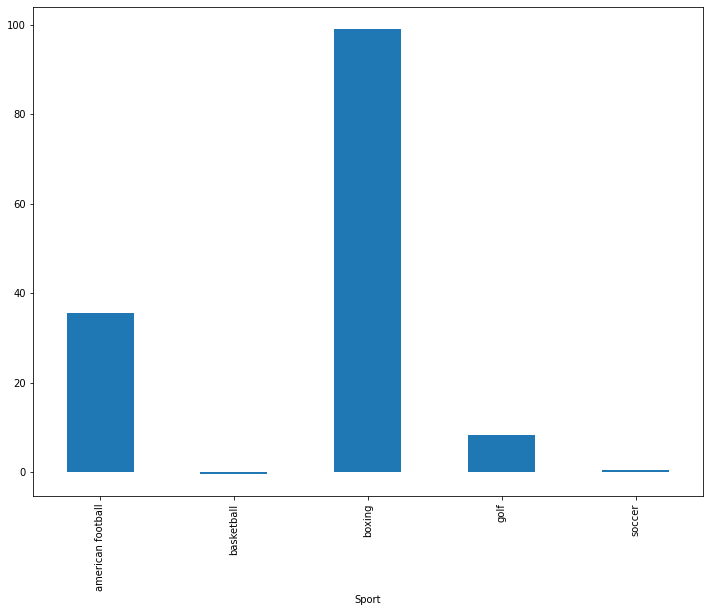

In [ ]:
df3[df3['Nationality']=='USA'].groupby('Sport').mean()['differenceRank'].plot.bar(figsize=(12, 9))

As We can see from numeric results and plot in **USA   boxing** is a sport , where athletes have the biggest increase in rating from 2016 to 2020,

# CONCLUSION

We got answers on our questions using calculutions and data visualization. Pandas, NumPy, PostgreSQL were pretty good tools to find answer on research question.

As answer on research question we got , that USA is  country, where athletes have the biggest increase in rating from 2016 to 2020 and the beggest rating increase precisely in boxing (the world trend).